In [33]:
# Import the training dataset
import pandas as pd

data = pd.read_csv("titanic/train.csv")
# Bug fixing needs downgrading to numpy version < 2: : pip install "numpy<2.0" 

In [34]:
# Exercise 1: Number of rows (ignoring NaN cells here)
num_of_rows = len(data)
num_of_rows

891

In [35]:
# Exercise 2: Age of Youngest passenger
youngest = data["Age"].min()
youngest

0.42

In [5]:
# Exercise 3: Age of oldest passenger
oldest = data["Age"].max()
oldest

80.0

In [36]:
# Exercise 4: Average age of all passengers (rounded to 2 decimal places)
avg = round(data["Age"].mean(),2)
avg

29.7

In [7]:
# Exercise 5: Fare which was paid most often
fare_most_often = data['Fare'].mode()
fare_most_often

0    8.05
Name: Fare, dtype: float64

In [37]:
# Exercise 6: Names and ages of the passengers older than 70 years
adult_names = data.loc[data["Age"] > 70, ["Name", "Age"]]
adult_names

,Name,Age
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
851,"Svensson, Mr. Johan",74.0


In [9]:
# Exercise 6: Number of the passengers older than 70 years
number_old_passengers = len(data.loc[data["Age"] > 70])
number_old_passengers

5

In [10]:
# Exercise 7: All male passengers embarking from Southhampton (abbreviation 'S')
data.loc[data['Embarked'].isin(['S']) & (data['Sex'] == 'male'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [11]:
# Exercise 8: Find the name, age, sex, survival status of the oldest passenger which survived
data.loc[(data['Age'] == data['Age'].max()) & (data['Survived'] == 1), ['Name', 'Age', 'Sex',  'Survived']]

,Name,Age,Sex,Survived
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,male,1


In [12]:
# Exercise 9: Sum all the fares of the passengers and round them to two decimal places
# Define function
def sum_fares() -> float:
    return round(data.loc[:,'Fare'].sum(),2)
# Call function
sum_fares()

28693.95

In [13]:
# Exercise 10: Write a function that rounds all Fares to Integers and assign a new column in our dataframe called 'Fare_int'

In [40]:
def round_fares(fare):
    rounded = round(fare, 0)
    return rounded

# Map the function to the Name column and assign a new column in our dataframe called Last Name
data['Fare_int'] = data['Fare'].apply(round_fares)

# Let's have a look at the first 5 rows
data.loc[:4, ['Fare', 'Fare_int']]

,Fare,Fare_int
0,7.2500,7.0
1,71.2833,71.0
2,7.9250,8.0
3,53.1000,53.0
4,8.0500,8.0


In [15]:
# Exercise 11: What is the total number of passengers from each class who survived?
data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [19]:
# Exercise 12: What was the average fare for male vs female passengers from each embarkment harbour?
data.groupby(['Embarked','Sex'])['Fare'].mean()

Embarked  Sex   
C         female    75.169805
          male      48.262109
Q         female    12.634958
          male      13.838922
S         female    38.740929
          male      21.711996
Name: Fare, dtype: float64

In [23]:
# Exercise 13: What was the average age for each Passenger class (rounded to one decimal point)?
round(data.groupby(['Pclass'])['Age'].mean(),1)


Pclass
1    38.2
2    29.9
3    25.1
Name: Age, dtype: float64

In [5]:
# Exercise 14: What was the average fare for passengers from each town?
data.groupby(['Embarked'])['Fare'].mean().reset_index()


,Embarked,Fare
0,C,59.954144
1,Q,13.276030
2,S,27.079812


In [6]:
# Exercise 15: What was the average fare for male vs. female passengers from each town?
data.groupby(['Embarked','Sex'])['Fare'].mean().reset_index()

,Embarked,Sex,Fare
0,C,female,75.169805
1,C,male,48.262109
2,Q,female,12.634958
3,Q,male,13.838922
4,S,female,38.740929
5,S,male,21.711996


<Axes: xlabel='Pclass', ylabel='Fare'>

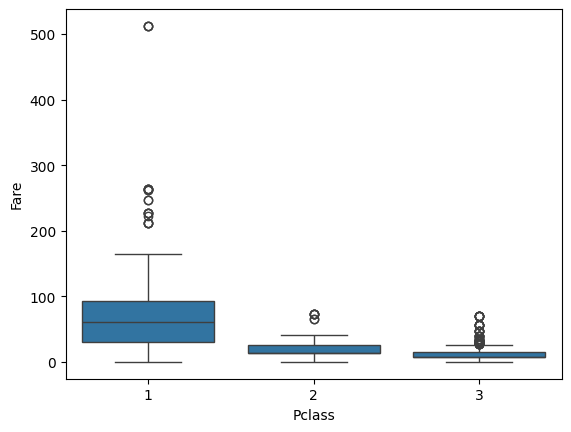

In [25]:
# Exercise 16: Create a box plot
# See for seaborn plots: https://www.geeksforgeeks.org/types-of-seaborn-plots/ 
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x="Pclass", y="Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

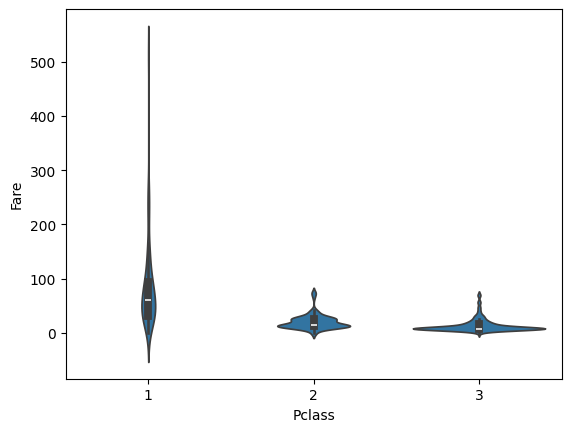

In [42]:
# Exercise 16: Create a violin plot
sns.violinplot(data=data, x="Pclass", y="Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

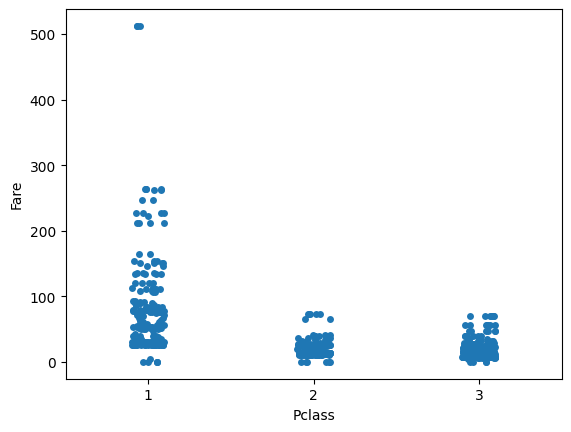

In [40]:
# Exercise 16: Create a strip plot
sns.stripplot(data=data, x="Pclass", y="Fare")